In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [3]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [5]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 151us/sample - loss: 0.1011 - accuracy: 0.9650 - val_loss: 0.7097 - val_accuracy: 0.8923
Epoch 2/20
48000/48000 [==============================] - 6s 130us/sample - loss: 0.0827 - accuracy: 0.9705 - val_loss: 0.7288 - val_accuracy: 0.8917
Epoch 3/20
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0872 - accuracy: 0.9692 - val_loss: 0.6833 - val_accuracy: 0.8923
Epoch 4/20
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0774 - accuracy: 0.9717 - val_loss: 0.7472 - val_accuracy: 0.8919
Epoch 5/20
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0805 - accuracy: 0.9712 - val_loss: 0.7653 - val_accuracy: 0.8934
Epoch 6/20
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0768 - accuracy: 0.9721 - val_loss: 0.7652 - val_accuracy: 0.8899
Epoch 7/20
48000/48000 [==========================

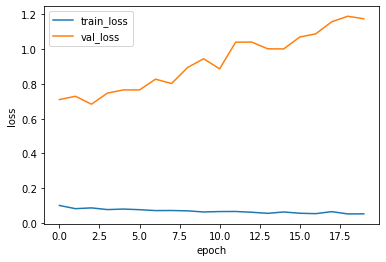

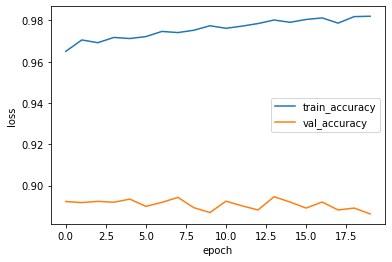

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()